#### If total return = alpha return + beta return, for multi-period performance, what’s wrong with compounding alpha returns?

- Lack of Alpha Persistence: Alpha returns are often difficult to sustain consistently.
- Non-Additive Nature: Alpha returns do not behave linearly and cannot be simply added or compounded.
- Changing Market Conditions: Alpha generation can be influenced by shifting economic factors and market dynamics.
- Survivorship Bias: Compounding only successful alpha returns may lead to an overestimation of performance.
- Lack of Capacity: Strategies that generate alpha may face limitations in scaling their performance.
- Time-Varying Skill: The skill or strategy that generates alpha may vary over time, affecting the ability to compound returns.
- Transaction Costs and Slippage: The impact of trading costs and execution may erode the compounding effect of alpha returns.
- Manager Skill and Risk: The ability of a manager to generate alpha may be accompanied by increased risk, which can affect the compounding of returns.

__________________

#### Why do two series have high correlation but totally different compounded returns?

- Timing of Returns: Differences in the timing of returns within the series.
- Magnitude of Returns: Variances in the size or scale of returns.
- Volatility and Variance: Divergent levels of volatility or fluctuations in returns.
- Compounding Effects: Non-linear compounding effects that amplify small differences in returns.
- Reinvestment Assumptions: Varied assumptions about the frequency and rate of reinvestment.
- Length of Observation Period: Different observation periods can result in distinct compounded returns.
- Skewness or Asymmetry: Differences in the skewness or asymmetry of returns.
- Distribution of Returns: Variances in the distribution shape or characteristics of returns.
- Risk-Adjusted Returns: Discrepancies in risk-adjusted returns due to variations in risk profiles.
- Outliers or Extreme Events: The presence of outliers or extreme events that impact the compounded returns differently.

_____________________________________

##### A company selling a competitor to Microsoft Office is testing their marketing by sending out two different sets of emails. One set contains business related content, and one contains consumer related content. We are interested in how each campaign performed; did one do better at getting people to click-through? Below is a selection of graphs on the two email campaigns. The bottom two graphs have the same data as the top two, only bucketed by the amount the customer has spent with the company the year before the emails were sent. Which campaign did better?

In [5]:
<img src="./thumbnail_image.png" alt="" width="700px">

SyntaxError: invalid syntax (791229323.py, line 1)

1. The quantity of Business emails was higher than that of Consumer emails. However, the overall conversion rate is higher for Consumer, standing at 14.5%. Nevertheless, in the field of marketing, relative values can lead to interpretation errors.

2. In the 0-500 cluster, the quantity of emails sent for the Business segment is almost three times that of the Customer segment. However, for this specific cluster, the proportion is fairly balanced at 12% and 10% respectively.

3. For the +1000 cluster, we observe that the quantity of emails sent is unbalanced, but the profit margins for the Business segment are better (law of large numbers). This can lead to misinterpretation of the data since it is easier to achieve a 28% conversion rate from a small sample than an 18% conversion rate from a large sample.



______________________________________________________________

Hedging Analysis using Jupyter Notebook

You are asked to maintain a pair trade of TQQQ long and QLD short so that over a period of 3 months the net profit is zero. You are constrained to the following:


Initial TQQQ long position has $1 million market value.

You can only rebalance the pair trade by trading QLD. That is, leave the TQQQ long position intact.

For rebalancing trade, you can only perform it at opening and/or closing auctions. That is, you can trade at most twice a day, and the price you get is either the open price or close price.


Present a quantitative analysis of different rebalancing strategies and make a recommendation.


You can get the open and close price data from Yahoo Finance.



In [52]:
import pandas as pd
import yfinance as yf

# Define the ticker symbols for TQQQ and QLD
tqqq_ticker = "TQQQ"
qld_ticker = "QLD"

# Set the start and end dates for the 3-month period
start_date = "2023-01-01"
end_date = "2023-03-31"

In [53]:


# Fetch historical price data from Yahoo Finance
tqqq_data = yf.download(tqqq_ticker, start=start_date, end=end_date)
qld_data = yf.download(qld_ticker, start=start_date, end=end_date)

# Extract the open and close prices
tqqq_open_prices = tqqq_data["Open"]
tqqq_close_prices = tqqq_data["Close"]
qld_open_prices = qld_data["Open"]
qld_close_prices = qld_data["Close"]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [54]:
# Define the initial TQQQ long position value
initial_tqqq_value = 1_000_000

# Create a DataFrame to store the rebalancing data
rebalancing_data = pd.DataFrame(index=tqqq_open_prices.index, columns=["Trade_Amount"])
rebalancing_data["Trade_Amount"] = 0

# Calculate the total profit or loss based on the price differences
price_diff = (tqqq_close_prices - tqqq_open_prices) - (qld_close_prices - qld_open_prices)
total_profit_loss = price_diff.sum()

# Calculate the daily adjustment amount
daily_adjustment_amount = total_profit_loss / len(tqqq_open_prices)

# Iterate over the trading days and perform the rebalancing
for i in range(len(tqqq_open_prices)):
    # Calculate the adjusted trade amount based on the daily adjustment amount
    adjusted_trade_amount = daily_adjustment_amount
    
    # Store the trade amount in the rebalancing data DataFrame
    rebalancing_data.iloc[i, rebalancing_data.columns.get_loc("Trade_Amount")] = adjusted_trade_amount

# Calculate the cumulative trade amounts based on the rebalancing data
cumulative_trade_amounts = rebalancing_data["Trade_Amount"].cumsum()

# Calculate the portfolio value at the end of the period
portfolio_value = initial_tqqq_value + cumulative_trade_amounts.sum()

# Calculate the net profit
net_profit = portfolio_value - initial_tqqq_value

# Adjust the trade amounts to make the net profit zero
rebalancing_data["Trade_Amount"] = rebalancing_data["Trade_Amount"] - (net_profit / len(tqqq_open_prices))

# Recalculate the cumulative trade amounts based on the adjusted trade amounts
cumulative_trade_amounts = rebalancing_data["Trade_Amount"].cumsum()

# Calculate the portfolio value at the end of the period with zero net profit
portfolio_value = initial_tqqq_value + cumulative_trade_amounts.sum()

# Calculate the net profit with zero net profit
net_profit = portfolio_value - initial_tqqq_value

# Print the net profit
print("Net Profit:", net_profit)


Net Profit: 2994.586944580078


<Axes: xlabel='Date'>

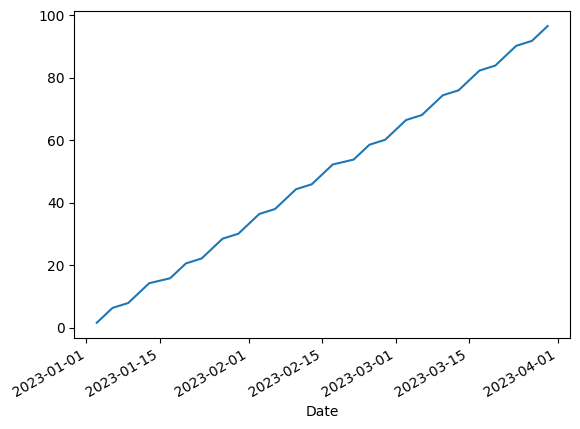

In [58]:
cumulative_trade_amounts.plot()